# 🔍 Minimal‑Δ Squared Binary Fractions — 128‑bit Precision & Control

**One click**: open in Colab → *Runtime ▸ Run all*.

* Scans `(i/2ⁿ)²` for `1 ≤ n ≤ 45` at 128‑bit precision.
* Reports smallest Δ for φ, π, α, **plus** a control constant √3 / π.
* Generates a log‑scale histogram comparing Δ distributions.
* Saves `precision_control_results_*.csv` in the working directory.


In [1]:
# ⬇️ Imports & config — no edits needed
import mpmath as mp, pandas as pd, numpy as np, matplotlib.pyplot as plt, time, math
mp.mp.dps = 40  # 128‑bit precision (~38 decimal)

MAX_BITS = 45           # scan n = 1 … 45
THRESH   = mp.mpf('1e-5')

PHI     = (1 + mp.sqrt(5)) / 2
PI      = mp.pi
ALPHA   = mp.mpf(1) / mp.mpf('137.035999')
CONTROL = mp.sqrt(3) / mp.pi  # baseline

CONSTANTS = [('phi', PHI), ('pi', PI), ('alpha', ALPHA), ('control', CONTROL)]
print('Precision set to', mp.mp.dps, 'decimal places')


Precision set to 40 decimal places


In [2]:
# ⚡ Fast nearest‑numerator scan
def nearest_hits(C, max_bits, thresh):
    hits = []
    sqrtC = mp.sqrt(C)
    for n in range(1, max_bits + 1):
        denom_int = 1 << n            # integer 2^n
        denom     = mp.mpf(denom_int) # mpf for division
        i         = int(mp.nint(sqrtC * denom))
        val       = (mp.mpf(i) / denom) ** 2
        delta     = abs(val - C)
        if delta < thresh:
            hits.append((n, i, delta))
    return hits


Best Δ per constant:


,constant,n,i,best Δ
0,phi,45,44755212652809,2.37758185369803235664137280333299664372e-14
1,pi,45,62362675800543,1.680145364832930941271476771852581280277e-14
2,alpha,44,1502804455995,1.772603405696174722998156189336850873981e-15
3,control,43,6531233203125,1.663828485498203757796010937855926993678e-14


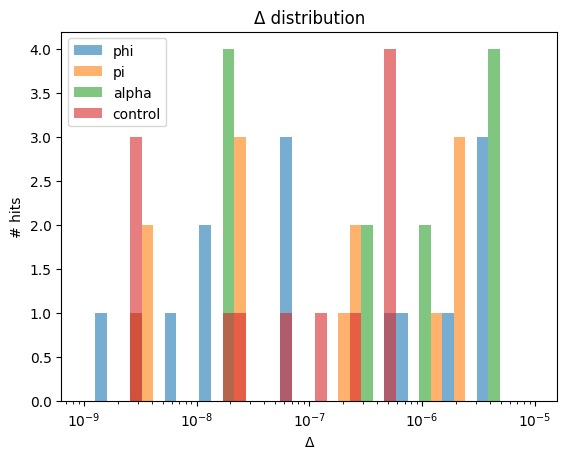

Elapsed 3.43 s


In [3]:
# ▶️ Run scans & visualise
start = time.time()
rows, delta_lists = [], {}

for name,const in CONSTANTS:
    hits = nearest_hits(const, MAX_BITS, THRESH)
    delta_lists[name] = [h[2] for h in hits]
    best = min(hits, key=lambda t: t[2]) if hits else (None,None,None)
    rows.append((name, *best))

df = pd.DataFrame(rows, columns=['constant','n','i','best Δ'])
print('Best Δ per constant:'); display(df)

# Histogram
import matplotlib.pyplot as plt
bins = np.logspace(np.log10(float(THRESH)*1e-4), np.log10(float(THRESH)), 40)
plt.figure()
for name,deltas in delta_lists.items():
    if deltas:
        plt.hist([float(x) for x in deltas], bins=bins, alpha=0.6, label=name)
plt.xscale('log'); plt.xlabel('Δ'); plt.ylabel('# hits'); plt.title('Δ distribution'); plt.legend(); plt.show()

print('Elapsed %.2f s' % (time.time()-start))


In [4]:
# 💾 Save summary CSV
import pathlib, datetime, os
ts = datetime.datetime.utcnow().strftime('%Y%m%d_%H%M%S')
csv_name = f'precision_control_results_{ts}.csv'
df.to_csv(csv_name, index=False)
print('CSV saved:', csv_name)


CSV saved: precision_control_results_20250716_101748.csv
